<a href="https://colab.research.google.com/github/ozakbas/CS412-Machine-Learning/blob/main/Practices/Medical_Charges_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

[The dataset](https://www.kaggle.com/mirichoi0218/insurance) contains the features and the cost of treatment of patients. We will try to estimate the medical charges billed by health insurance with linear regression.


In [1]:
import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/ozakbas/01494423461eb503326599ea50b8f071/raw/3cba04daf0b6ab53160bd4488db207b667e6db97/insurance.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
labels = df['charges']

# Data Preprocessing

Our model cannot work with categorical data directly. The categories (sex, smoker, region) must be converted into numbers. We will create a matrix of one-hot encoded features

In [3]:
categorical_values = ['sex', 'smoker', 'region']

partial_df = df[categorical_values]
partial_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [4]:
encoded = pd.get_dummies(partial_df)
encoded.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [5]:
df = df.drop(columns=categorical_values)

# Concatenate pandas object along columns (axis:1)
df = pd.concat((df, encoded), axis=1)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


We need to scale numerical values (age, bmi, children) since they cannot be compared. StandardScaler will standardize features by removing the mean and scaling to unit variance.

In [6]:
from sklearn.preprocessing import StandardScaler

numericals = ['age', 'bmi', 'children']

scaler = StandardScaler()
scaled_features_np = scaler.fit_transform(df[numericals])
scaled_features = pd.DataFrame(scaled_features_np, columns=numericals)
scaled_features.head()

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [7]:
df_scaled = pd.concat((scaled_features, encoded), axis = 1)
df_scaled.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0


# Splitting the Dataset

In [8]:
from sklearn.model_selection import train_test_split

X, x_test, y, y_test = train_test_split(df_scaled, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1/9, random_state=42)
print(" Train data shape:", x_train.shape,
      "\n Train label shape:", y_train.shape, 
      "\n Validation data shape:", x_val.shape,
      "\n Validation label shape:", y_val.shape)

 Train data shape: (1070, 11) 
 Train label shape: (1070,) 
 Validation data shape: (134, 11) 
 Validation label shape: (134,)


# Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
prediction = model.predict(x_train)

print('Coefficients: \n', model.coef_)
print('Bias:', model.intercept_)
print("Mean absolute error: {}".format(mean_absolute_error(y_train, prediction)))
print("Mean squared error: {}".format(mean_squared_error(y_train, prediction)))

Coefficients: 
 [  3637.2851671    2025.8161959     526.41626458    208.75940539
   -208.75940539 -12084.40534302  12084.40534302    551.92812585
    143.7502392    -368.78426242   -326.89410263]
Bias: 20616.28329721585
Mean absolute error: 4287.885064760804
Mean squared error: 38374045.48976207


In [11]:
prediction = model.predict(x_val)

print("Mean absolute error: {}".format(mean_absolute_error(y_val, prediction)))
print("Mean squared error: {}".format(mean_squared_error(y_val, prediction)))

Mean absolute error: 3530.611201443839
Mean squared error: 26289662.52421199


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(x_train)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

prediction = lin_reg_2.predict(X_poly_train)

print('Coefficients: \n', lin_reg_2.coef_)
print('Bias:', lin_reg_2.intercept_)

print("Mean absolute error: {}".format(mean_absolute_error(y_train, prediction)))
print("Mean squared error: {}".format(mean_squared_error(y_train, prediction)))

Coefficients: 
 [-6.61096173e+12 -1.26819472e+16  2.77824094e+15  1.14438803e+16
 -5.09350885e+15  8.32894037e+15 -3.43206572e+15 -2.16142357e+15
  1.44898740e+15 -2.52653701e+15  2.59777950e+15  3.73141286e+15
  8.07255636e+02  1.53198171e+01 -2.25364170e+02  8.25716218e+15
  8.25716218e+15  5.11332348e+15  5.11332348e+15 -6.88538495e+14
 -6.88538495e+14 -6.88538495e+14 -6.88538495e+14 -2.95061471e+02
  3.58456289e+01 -6.07174451e+14 -6.07174451e+14 -2.45155264e+15
 -2.45155264e+15  2.80486153e+14  2.80486153e+14  2.80486153e+14
  2.80486153e+14 -2.04000000e+02 -5.25054880e+15 -5.25054880e+15
 -2.65326354e+15 -2.65326354e+15 -3.54006795e+15 -3.54006795e+15
 -3.54006795e+15 -3.54006795e+15  3.74856767e+15  0.00000000e+00
  1.39902436e+15 -1.62256102e+15  1.20021256e+15  3.23275853e+15
 -1.28785135e+14  1.16141494e+14 -3.74856767e+15 -1.99658698e+15
 -5.01817236e+15 -1.32948998e+15  7.03055988e+14 -2.65848767e+15
 -2.41356104e+15 -1.06357780e+15  0.00000000e+00 -1.57580170e+15
  7.71883

In [13]:
X_poly_test = poly_reg.transform(x_test)
X_poly_test.shape

y_pred = lin_reg_2.predict(X_poly_test)

print("Test Mean absolute error: {}".format(mean_absolute_error(y_test, y_pred)))
print("Test Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Test Mean absolute error: 2770.130245
Test Mean squared error: 19796431.22299568


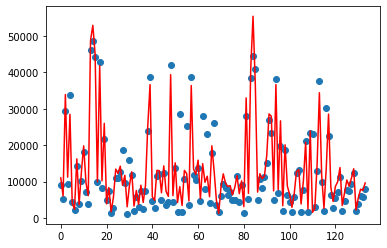

In [14]:
import numpy as np
import matplotlib.pyplot as plt

xaxis = np.arange(y_test.shape[0])
plt.scatter(xaxis,y_test)
plt.plot(xaxis,y_pred, 'r')